Exploring model productivity and trophic transfer efficiency for the lower trophic levels in the Salish Sea Atlantis Model 

In [2]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Productivity and Trophic Transfer Efficiency
spatial and temporal plots of productivity & trophic transfer efficiency for comparison with SalishSeaCast

In [2]:
filename = "v6699_50y_20241105_fisheriesOFF"

In [4]:
# Reading in Atlantis map

shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

In [5]:
# Reading Productivity files & variables
PROD_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + filename + "/outputSalishSeaPROD.nc"
PROD = xr.open_dataset(str(PROD_file), decode_cf=True)
PROD_time = np.ma.filled(PROD.variables['t'], np.nan)

Using output from Atlantis boxes 82 - 86  for comparison with SalishSeaCast productivity for the Strait of Georgia, 

In [6]:
t2008 = np.where(PROD_time=='2016-01-01T14:00:00.000000000')
tstop = 255 #np.where(PROD_time=='2017-01-01T14:00:00.000000000')[0][0]

/tmp/ipykernel_2977606/3787966597.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  t2008 = np.where(PROD_time=='2016-01-01T14:00:00.000000000')


In [7]:
PROD_time.shape

(204,)

In [8]:
microzoo_prod = np.ma.filled(PROD.variables['MicroZooProdn'], np.nan) #ZS mg N m-3 d-1
zoo_prod = np.ma.filled(PROD.variables['ZooProdn'], np.nan) #ZS mg N m-3 d-1
carn_zoo_prod = np.ma.filled(PROD.variables['Carniv_ZooProdn'], np.nan) #ZL mg N m-3 d-1
gel_zoo_prod = np.ma.filled(PROD.variables['Gelat_ZooProdn'], np.nan) #ZG mg N m-3 d-1

diatom_prod = np.ma.filled(PROD.variables['DiatomProdn'], np.nan) #PL mg N m-3 d-1
pico_prod = np.ma.filled(PROD.variables['PicoPhytoplProdn'], np.nan) #PS mg N m-3 d-1

mesozooplankton_sog_prod = (carn_zoo_prod[:, 82:86] + gel_zoo_prod[:, 82:86]) # *5.7 to convert to mgC m-3 d-1
microzooplankton_sog_prod = microzoo_prod[:, 82:86]
zooplankton_sog_prod = zoo_prod[:, 82:86]

phytoplankton_sog_prod = (diatom_prod[:, 82:86] + pico_prod[:, 82:86])

In [9]:
phytoplankton_sog_prod.shape

(204, 4)

In [10]:
np.max(phytoplankton_sog_prod)/14.0067 #convert to mmol N

5.069779175128833

Trophic Transfer Efficiency (TTE) = secondary productivity [zooplankton] / primary productivity [phytoplankton]

In [11]:
# all zooplankton productivity
tte_sog_per_box = (zooplankton_sog_prod / phytoplankton_sog_prod)*100
tte_sog = tte_sog_per_box.sum(axis=1)

/tmp/ipykernel_2977606/2727167360.py:2: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box = (zooplankton_sog_prod / phytoplankton_sog_prod)*100


In [41]:
# microzoo versus mesozoo
tte_sog_per_box_microzoo = (microzooplankton_sog_prod / phytoplankton_sog_prod)*100
tte_sog_per_box_mesozoo = (mesozooplankton_sog_prod / phytoplankton_sog_prod)*100
tte_sog_per_box_zoo = (zooplankton_sog_prod / phytoplankton_sog_prod)*100
tte_sog_microzoo = tte_sog_per_box_microzoo.sum(axis=1)
tte_sog_mesozoo = tte_sog_per_box_mesozoo.sum(axis=1)
tte_sog_zoo = tte_sog_per_box_zoo.sum(axis=1)

/tmp/ipykernel_2977606/3932327642.py:2: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_microzoo = (microzooplankton_sog_prod / phytoplankton_sog_prod)*100
/tmp/ipykernel_2977606/3932327642.py:3: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_mesozoo = (mesozooplankton_sog_prod / phytoplankton_sog_prod)*100
/tmp/ipykernel_2977606/3932327642.py:4: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_zoo = (zooplankton_sog_prod / phytoplankton_sog_prod)*100


In [12]:
tte_sog.shape

(204,)

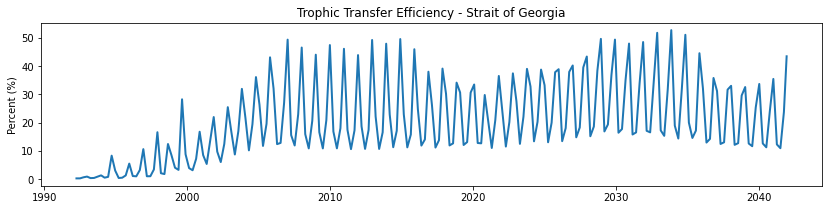

In [45]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time, tte_sog, linewidth = 2) 
ax.set_title('Trophic Transfer Efficiency - Strait of Georgia', fontsize = 12)
ax.set_ylabel('Percent (%)');
#ax.set_ylabel('mgN m$^{-3}$ d$^{-1}$)');

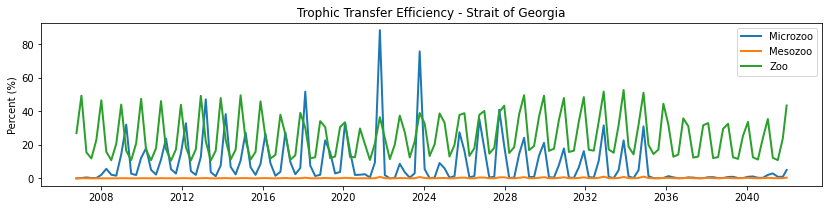

In [46]:
# after model burn-in
start = 60
end = PROD_time.size
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time[start:end], tte_sog_microzoo[start:end], linewidth = 2) 
ax.plot(PROD_time[start:end], tte_sog_mesozoo[start:end], linewidth = 2) 
ax.plot(PROD_time[start:end], tte_sog_zoo[start:end], linewidth = 2) 
ax.set_title('Trophic Transfer Efficiency - Strait of Georgia', fontsize = 12)
ax.set_ylabel('Percent (%)');
ax.legend(['Microzoo','Mesozoo','Zoo']);
#ax.set_ylabel('mgN m$^{-3}$ d$^{-1}$)');

/tmp/ipykernel_2977606/3818129209.py:2: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_microzoo = (microzooplankton_sog_prod / phytoplankton_sog_prod)*100
/tmp/ipykernel_2977606/3818129209.py:3: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_mesozoo = (mesozooplankton_sog_prod / phytoplankton_sog_prod)*100
/tmp/ipykernel_2977606/3818129209.py:4: RuntimeWarning: invalid value encountered in true_divide
  tte_sog_per_box_zoo = (zooplankton_sog_prod / phytoplankton_sog_prod)*100


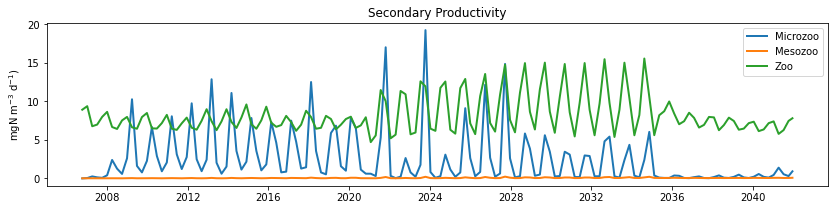

In [39]:
start = 60
end = PROD_time.size
fig, ax = plt.subplots(1,1, figsize = (14,3))
ax.plot(PROD_time[start:end], microzooplankton_sog_prod[start:end].sum(axis=1), linewidth = 2) 
ax.plot(PROD_time[start:end], mesozooplankton_sog_prod[start:end].sum(axis=1), linewidth = 2)
ax.plot(PROD_time[start:end], zooplankton_sog_prod[start:end].sum(axis=1), linewidth = 2)
ax.set_title('Secondary Productivity', fontsize = 12)
#ax[0].set_ylabel('Percent (%)');
ax.set_ylabel('mgN m$^{-3}$ d$^{-1}$)')
ax.legend(['Microzoo','Mesozoo','Zoo']);


#### Time slice: 2019 - 2022

In [53]:
tstop = PROD_time.size - 80 #np.where(PROD_time=='2017-01-01T14:00:00.000000000')[0][0]
tstart = tstop - 12 #np.where(PROD_time=='2016-01-01T14:00:00.000000000')[0][0]

microzoo_prod_t = PROD.variables['MicroZooProdn'][tstart:tstop][:] #ZS
mesozoo_prod_t = PROD.variables['ZooProdn'][tstart:tstop][:] #ZS
carn_zoo_prod_t = PROD.variables['Carniv_ZooProdn'][tstart:tstop][:] #ZL
gel_zoo_prod_t = PROD.variables['Gelat_ZooProdn'][tstart:tstop][:] #ZG

diatom_prod_t = PROD.variables['DiatomProdn'][tstart:tstop][:] #PL
pico_prod_t = PROD.variables['PicoPhytoplProdn'][tstart:tstop][:] #PS

zoo_prod_t = (microzoo_prod_t + mesozoo_prod_t + carn_zoo_prod_t + gel_zoo_prod_t)*5.7 #converted mg N m-3 d-1 to mgC m-3 d-1 
phyto_prod_t = (diatom_prod_t + pico_prod_t)*5.7


In [54]:
dz = PROD.variables['dz'][tstart:tstop][:] #depth
zoo_prod_m2 = zoo_prod_t
for box in range(0,zoo_prod_t[1,:].size):
    zoo_prod_m2[:,box] = zoo_prod_t[:,box] / dz[:,box].max(axis=1)

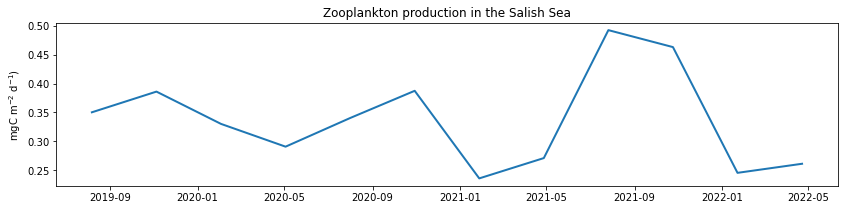

In [55]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time[tstart:tstop], zoo_prod_m2.mean(axis=1), linewidth = 2) #control_time, param_control, 
ax.set_title('Zooplankton production in the Salish Sea', fontsize = 12)
ax.set_ylabel('mgC m$^{-2}$ d$^{-1}$)');

In [56]:
phyto_prod_m2 = phyto_prod_t
for box in range(0,phyto_prod_t[1,:].size):
    phyto_prod_m2[:,box] = phyto_prod_t[:,box] / dz[:,box].max(axis=1)

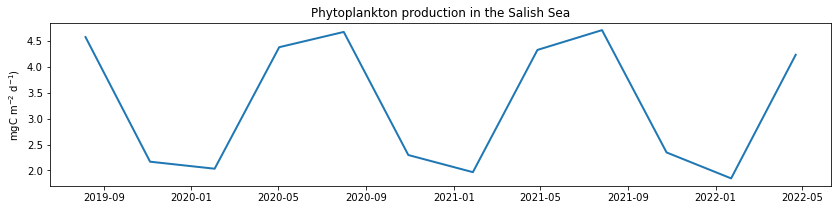

In [57]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time[tstart:tstop], phyto_prod_m2.mean(axis=1), linewidth = 2) #control_time, param_control, 
ax.set_title('Phytoplankton production in the Salish Sea', fontsize = 12)
ax.set_ylabel('mgC m$^{-2}$ d$^{-1}$)');

In [58]:
phyto_prod_all = phyto_prod_t.sum(axis=1)
int(phyto_prod_all.mean())


283

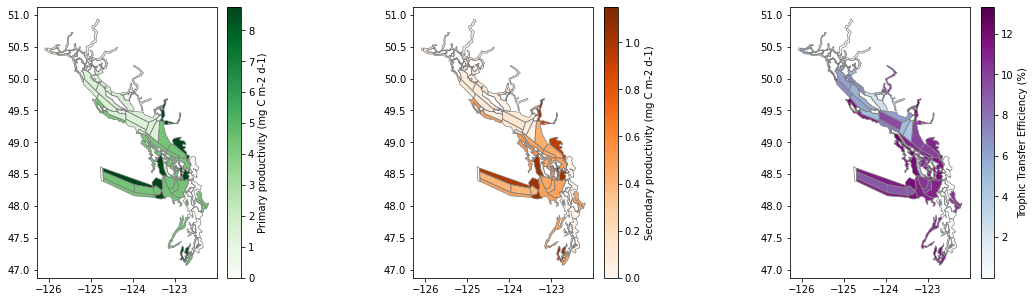

In [73]:
# Spatial Plots
data_df['zoo_prod'] = zoo_prod_t.mean(axis=0) #/14.0067 #convert to mmol N
data_df['phyto_prod'] = phyto_prod_t.mean(axis=0) #/14.0067 #convert to mmol N
data_df['tte'] = (data_df['zoo_prod'] / data_df['phyto_prod'])*100
#data_df.loc[land_boxes, 'zoo_prod'] = 0
#data_df.loc[land_boxes, 'zoo_prod'] = 0

land_df = data_df.loc[land_boxes]
v_min = 0
v_max = 100 #np.max(dVar)

fig = plt.figure(figsize=(18, 9), facecolor='white') #figsize=(9, 12)
gs = plt.GridSpec(1, 3, wspace=0.5, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1],)


ax = fig.add_subplot(gs[0, 0])    
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.5) 
ax = data_df.plot(column = 'phyto_prod', cmap=cm.Greens, ax=ax, cax=cax,#vmin=0, vmax=20, 
    legend=True, legend_kwds={'label': 'Primary productivity (mg C m-2 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white')

ax = fig.add_subplot(gs[0, 1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.5) 
ax = data_df.plot(column = 'zoo_prod', cmap=cm.Oranges, ax=ax, cax=cax,
    legend=True, legend_kwds={'label': 'Secondary productivity (mg C m-2 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white') 

ax = fig.add_subplot(gs[0, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.5) 
ax = data_df.plot(column = 'tte', cmap=cm.BuPu, ax=ax, cax=cax,
    legend=True, legend_kwds={'label': 'Trophic Transfer Efficiency (%)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

#print(num_steps)



## Plankton Biomass
comparison of plankton biomass to SalishSeaCast biomass

In [41]:
#Atlantis Diatoms
filename = "v6718_365_20241105_fisheriesOFF"
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + filename + "/outputSalishSea.nc"
ssam_data = xr.open_dataset(str(data_file), decode_cf=True) #[t, box, z]

ssam_time = ssam_data.t

ssam_volume = ssam_data.volume
diatoms_SSAM_tbz = ssam_data.Diatom_N * ssam_volume #convert to mg N 
diatoms_SSAM_tb = diatoms_SSAM_tbz.sum(axis=2)

In [47]:
diatoms_SSAM_t = diatoms_SSAM_tb.sum(axis=1) * 0.000001 # convert from mg N to tonnes

In [25]:
#SalishSeaCast Diatoms

#dfile10 = "/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_20070101_20070110.nc"
#dfile30 = "/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_20070101_20070131.nc"
data = xr.open_dataset('/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_compressed_20070101_20070131.nc')
mesh = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

#data10 = xr.open_dataset(str(dfile10), decode_cf=True)
#data30 = xr.open_dataset(str(dfile30), decode_cf=True)

#m3_correction = mask.variables["e1t"] *  mask.variables["e2t"] * mask.variables["e3t_0"] #e1t and e2t are [t,y,x] but e3t_0 [t,z,y,x]

In [26]:
volume = (mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})

In [27]:
volume.shape #[t,y,x,z]

(40, 898, 398)

In [42]:
diatoms_SSC_tzyx = data.variables["diatoms"] # [t,z,y,x]

In [21]:
diatoms_SSC_tzyx.shape

(31, 40, 898, 398)

In [28]:
diatoms_SSC_tzyx = diatoms_SSC_tzyx * volume # convert from mmol m-3 to mmol

In [30]:
diatoms_SSC.shape

(31, 40, 898, 398)

Need to convert each box to mmols because each box volume is different in SSC.

e1t * e2t * e3t and these are in the meshmask file

Doug says the metadata in the files I used has a path in the notebook that shows the averaging concentration. They are daily averaged over time but not averaged in space. 

In [31]:
# Convert mmol N x 1000 mol N * 14.0067 g/mol * 0.000001 tonnes 
diatoms_SSC_tzy = diatoms_SSC.sum(axis=3)
diatoms_SSC_tz = diatoms_SSC_tzy.sum(axis=2)
diatoms_SSC_t = diatoms_SSC_tz.sum(axis=1) * (1000*14.0067*0.000001) #convert to tonnes

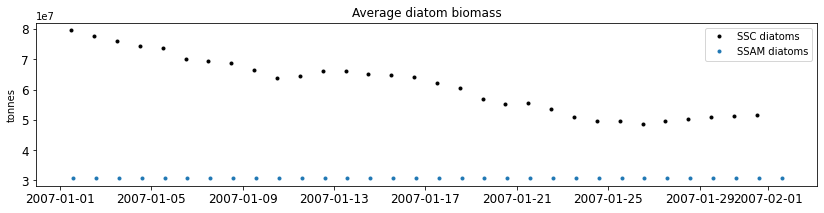

In [50]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(data.time, diatoms_SSC_t, 'k.', linewidth = 2)
ax.plot(ssam_time[5:37], diatoms_SSAM_t[5:37],'.', linewidth = 2) #semilogy
ax.set_title('Average diatom biomass', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(('SSC diatoms', 'SSAM diatoms'), loc='best');


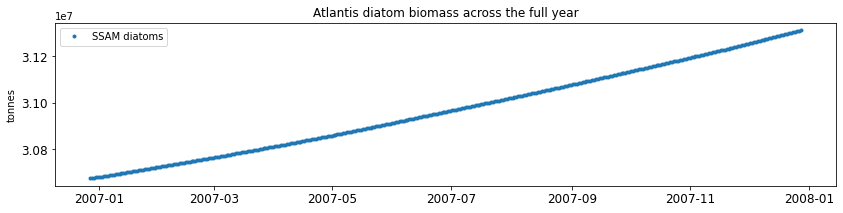

In [52]:
#Plots
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(ssam_time, diatoms_SSAM_t,'.', linewidth = 2)
ax.set_title('Atlantis diatom biomass across the full year', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(['SSAM diatoms'], loc='best');